# File Mount

In [133]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
os.chdir('/content/drive/MyDrive/CV')

# Digital image

### Color Image

Color | RGB value   |
-------|:------------------|
Red  | 255, 0, 0   | 
Orange | 255, 128, 0  | 
Pink  | 255, 153, 255 | 


### OpenCV imread
retval	=	cv.imread(	filename[, flags]	)

In the case of color images, the decoded images will have the channels stored in B G R order.

[cv.imread()](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)

![](https://i.imgur.com/qHhzwqQ.png)


### matplotlib.pyplot.imshow
(X,cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)

(M, N, 3): an image with RGB values (0-1 float or 0-255 int).

(M, N, 4): an image with RGBA values (0-1 float or 0-255 int),  i.e. including transparency

![image.png](https://i.imgur.com/Sl4fkuJ.png)



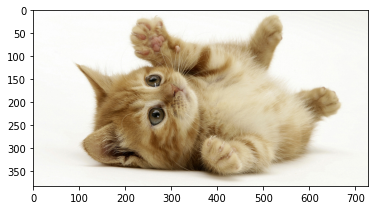

In [135]:
from IPython.display import display
from PIL import Image
from  matplotlib import pyplot as plt
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread("Cat.jpg") # the decoded images will have the channels stored in B G R order.

# type(image)
# # method 1
# b,g,r = cv2.split(image)
# image = cv2.merge([r,g,b])

# method 2
image = image[:,:,::-1]

plt.imshow(image)

plt.show()

![](https://i.imgur.com/wF6e2ss.png)

In [136]:
print(image.shape) #picutre shape
print(image[100,150]) #one pixel color space

(382, 728, 3)
[255 255 255]


In [137]:
print(image.dtype)

uint8


# 7 image point processing

At 2. introduction to Computer Vision (p.7)

![image.png](https://i.imgur.com/D2amXGP.jpg)

In [138]:
image_list = []
pros_list = []

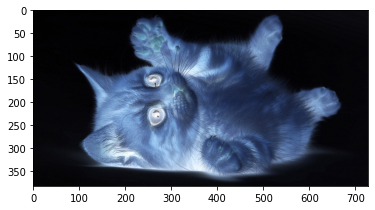

In [139]:
# image invert #
# -------- To do ------------- #
invert_image=255-image

plt.imshow(invert_image)

plt.show()

![](https://i.imgur.com/AIimytN.png)

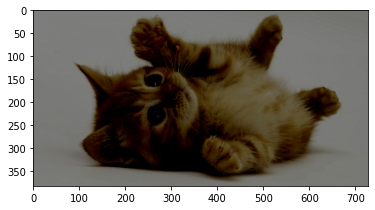

In [140]:
# image datken #
# -------- To do ------------- #
darken_image=image.copy()

darken_image[image>=128] =image[image>=128]-128

darken_image[image<128] = 0

plt.imshow(darken_image)

plt.show()

![](https://i.imgur.com/XszAswI.png)

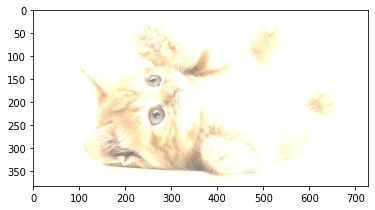

In [141]:
# image lighten #
# -------- To do ------------- #
lighten_image=image.copy()

lighten_image[image>=128]=255

lighten_image[image<128]=image[image<128]+128

plt.imshow(lighten_image)

plt.show()

![](https://i.imgur.com/09YUYb2.png)

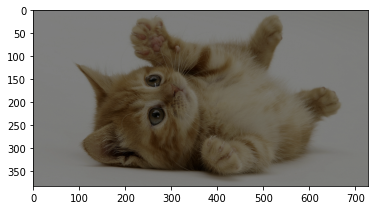

In [142]:
# image Lower Contrast #
# -------- To do ------------- #
lower_contrast_image = image.copy()/2

lower_contrast_image = lower_contrast_image/255

plt.imshow(lower_contrast_image)

plt.show()

![](https://i.imgur.com/YCVmvEt.png)

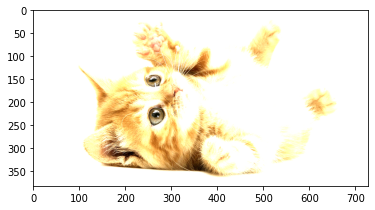

In [143]:
# image raise contrast #
# -------- To do ------------- #
raise_contrast_image=image.copy()

raise_contrast_image[image>=127.5]=255

raise_contrast_image[image<127.5]=image.copy()[image<127.5]*2

raise_contrast_image = raise_contrast_image/255

plt.imshow(raise_contrast_image)

plt.show()

![](https://i.imgur.com/YkZYYnl.png)


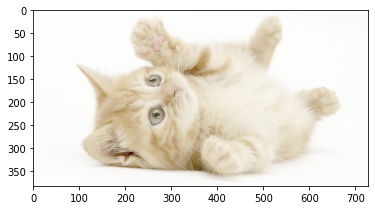

In [144]:
# Non-linear lower contrast #
# -------- To do ------------- #
temperal_image = image.copy()

temperal_image = ((image/255)**(1/3))*255

nonlinera_lower_contrast_image = temperal_image.astype(np.uint8)

plt.imshow(nonlinera_lower_contrast_image)

plt.show()

![](https://i.imgur.com/n5WNNUD.png)


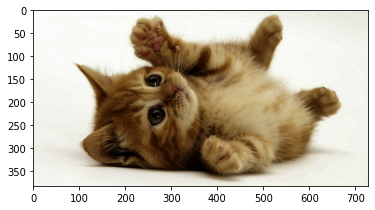

In [145]:
# Non-linear raise contrast #
# -------- To do ------------- #
temp_image = image.copy()

temp_image = ((image/255)**2)*255

nonlinera_raise_contrast_image = temp_image.astype(np.uint8)

plt.imshow(nonlinera_raise_contrast_image)

plt.show()

![](https://i.imgur.com/jMahpmf.png)


In [146]:
len(image_list),len(pros_list)

(0, 0)

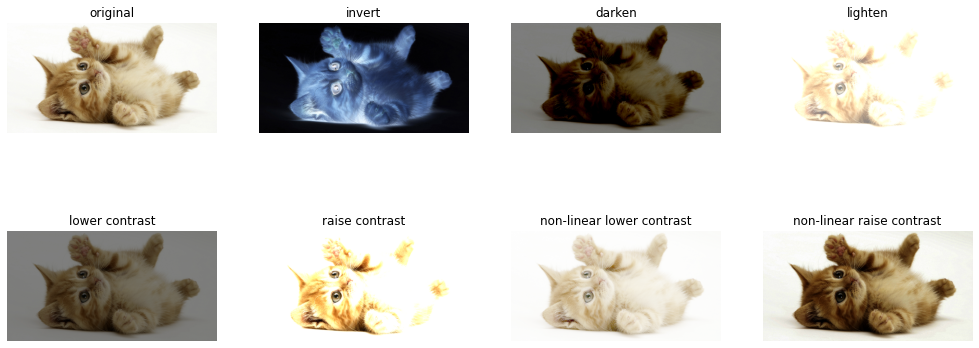

In [147]:
# plot all the point processing image #
# -------------- To do -----------------

plt.figure(figsize=(17.3,7)) 
plt.subplot(2,4,1), plt.title('original')
plt.imshow(image), plt.axis('off')

plt.subplot(2,4,2), plt.title('invert')
plt.imshow(invert_image), plt.axis('off')

plt.subplot(2,4,3), plt.title('darken')
plt.imshow(darken_image), plt.axis('off')

plt.subplot(2,4,4), plt.title('lighten')
plt.imshow(lighten_image), plt.axis('off')

plt.subplot(2,4,5), plt.title('lower contrast')
plt.imshow(lower_contrast_image), plt.axis('off')

plt.subplot(2,4,6), plt.title('raise contrast')
plt.imshow(raise_contrast_image), plt.axis('off')

plt.subplot(2,4,7), plt.title('non-linear lower contrast')
plt.imshow(nonlinera_lower_contrast_image), plt.axis('off')

plt.subplot(2,4,8), plt.title('non-linear raise contrast')
plt.imshow(nonlinera_raise_contrast_image), plt.axis('off')

plt.show()


![](https://i.imgur.com/wWo7Cr4.png)


In [148]:
# fig.savefig('Point Processing.png') # save the image

# Filter

## Gaussian filter
### Opencv Library

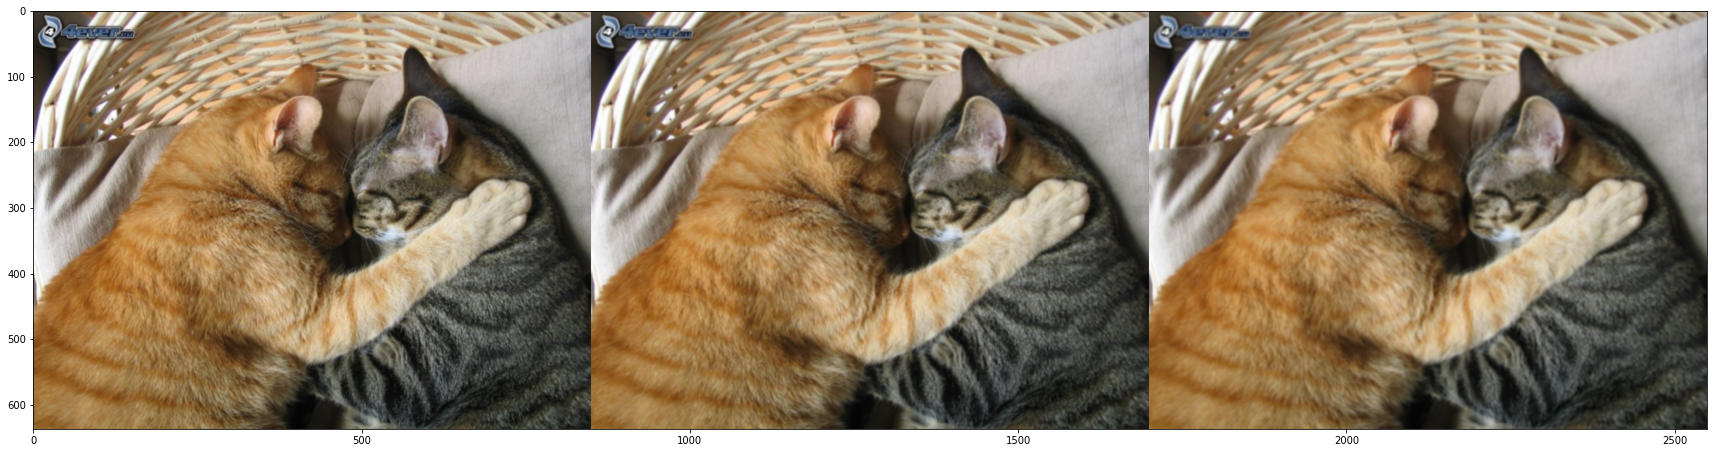

In [149]:
image_G = cv2.imread("HugCats.jpg")
fig = plt.figure(figsize=(30,40))
blurred = np.hstack([cv2.GaussianBlur(image_G,(3,3),0)[:,:,::-1],
                     cv2.GaussianBlur(image_G,(5,5),0)[:,:,::-1],
                     cv2.GaussianBlur(image_G,(7,7),0)[:,:,::-1]
                     ])

# cv2.imwrite("Gaussian.jpg",blurred[:,:,::-1])
plt.imshow(blurred)
plt.show()

## Step1 : Get filter kernel

![image.png](https://i.imgur.com/oh9HkZA.png)

[OpenCV getGaussianKernel](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))

### getGaussianKernel(int ksize, double sigma, int ktype=CV_64F )

### Parameters:	
**ksize** – Aperture size. It should be odd ( $ksize\ mod\ 2 = 1$) and positive.

**sigma** – Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\ \ sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8$

**ktype** – Type of filter coefficients. It can be CV_32f or CV_64F .

$G_i = \alpha * e^{(-i-(ksize-1)/2)^2/(2*sigma^2)},$

$where\ i = 0 \sim ksize-1,\ and\ \alpha\ is\ the\ scale\ factor\ chosen\ so\ that \sum_iG_i=1$

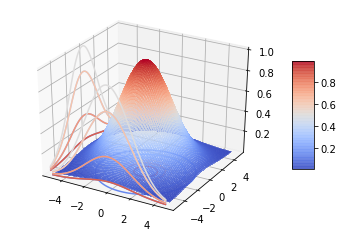

In [150]:
sigma = 2
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
from matplotlib import animation
from IPython.display import HTML
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2+Y**2)/(2*sigma**2))

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap=cm.coolwarm,linewidth=0, antialiased=False,alpha=0.5)
#fig.colorbar(surf, shrink=0.5, aspect=5)
#ax.plot_wireframe(x, y, F(x), rstride=10, cstride=10)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.1, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-5.5, cmap=cm.coolwarm) 
cset = ax.contour(X, Y, Z, zdir='y', offset=-5.5, cmap=cm.coolwarm)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [151]:
import math

def GaussiaFilter(KernelSize):
    sigma = 0.3*((KernelSize-1)*0.5-1)+0.8 # ------------ todo ---------- #
    # print(sigma)
    # kernel =[] 
    kernel=np.zeros((KernelSize,KernelSize))
    # print(kernel)
    total=0 #各係數相加後總值
    s=int((KernelSize-1)/2)
    for i in range(0,KernelSize):
        for j in range(0,KernelSize): 
            #--------- to do ---------- #
            kernel[i,j]= 1/(2*(math.pi)*(sigma**2) )*( math.exp(-(((i-s)**2)+((j-s)**2))/(2*(sigma**2))) )
            # print(kernel[i,j])
            total=total+kernel[i,j]
    return np.array(kernel)/total

row,col,_=image_G.shape
KernelSize=7

Gaussian_Kernel=GaussiaFilter(KernelSize)
# print(Gaussian_Kernel.reshape(KernelSize,-1))
print('Sum of filter :',np.sum(Gaussian_Kernel))

Sum of filter : 0.9999999999999998


## Step 2 : Convolution


[The difference between convolution and cross-correlation from a signal-analysis point of view](https://dsp.stackexchange.com/questions/27451/the-difference-between-convolution-and-cross-correlation-from-a-signal-analysis)

[Border type](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

![](https://i.imgur.com/qEYv2fV.png)
![](https://i.imgur.com/SGeFKLD.png)

In [152]:
#Convolution
resx=np.zeros((row,col,3),np.uint8) #initial a result image_G
#resx=np.zeros((row-int((KernelSize-1)/2),col-int((KernalSize-1)/2),3),np.uint8) #initial a result imimage_Gage

for x in range(row):
    for y in range(col):
        if x<(KernelSize-1)/2 or x>=row-(KernelSize-1)/2 or y<(KernelSize-1)/2 or y>=col-(KernelSize-1)/2:
          '''
          Border type
          '''
          # --------- to do ------------- #
          resx[x,y]=0

        else:
            respixel=0
            for i in range(-(KernelSize-1)//2,(KernelSize+1)//2):
                for j in range(-(KernelSize-1)//2,(KernelSize+1)//2):
                    # --------- to do ------------- #
                    
                    respixel=respixel+Gaussian_Kernel[i+((KernelSize-1)//2),j+((KernelSize-1)//2)]*image_G[x+i,y+j]

           
            resx[x,y]=respixel

## Step3 Result

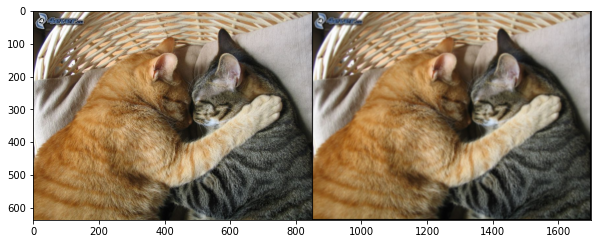

In [153]:
fig = plt.figure(figsize=(10,20))
G_res = np.hstack([image_G[:,:,::-1],resx[:,:,::-1]])
plt.imshow(G_res)
# cv2.imwrite("Gaussian_H.jpg",G_res[:,:,::-1])
plt.show()

# Downsampling

![](https://i.imgur.com/0zrrdKy.png)

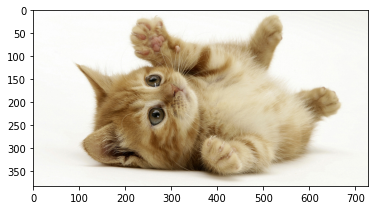

In [154]:
img = cv2.imread('Cat.jpg')
b,g,r = cv2.split(img)
DownSamp_Origin = cv2.merge([r,g,b])
plt.imshow(DownSamp_Origin)
plt.show()

In [155]:
def DownSamplingFunction(src,samplingScale):
    [row,col,depth]=src.shape
    #新圖片大小為:newrow=row*samplingScale  newcol=col*samplingScale
    dst=np.zeros((round(row*samplingScale),round(col*samplingScale),depth), np.uint8)
    
    for x in range(round(row*samplingScale)):
        for y in range(round(col*samplingScale)):
            # ----------- to do ------------------ #
            dst[x,y]=src[int(x/samplingScale),int(y/samplingScale)]
    return dst

### Downsampling Without Gaussian Filter

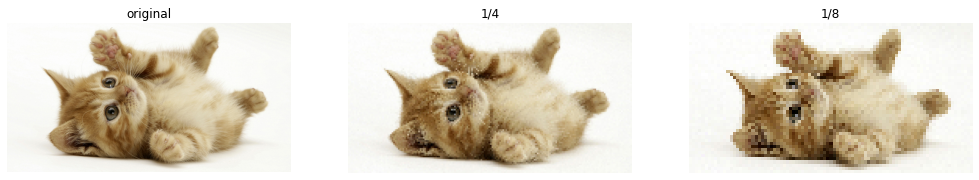

In [156]:
# ----------- plot to do ------------------ #
DownSamp_4=DownSamplingFunction(DownSamp_Origin,1/4)
DownSamp_8=DownSamplingFunction(DownSamp_Origin,1/8)
plt.figure(figsize=(17.3,7)) 

plt.subplot(1,3,1), plt.title('original')
plt.imshow(DownSamp_Origin), plt.axis('off')

plt.subplot(1,3,2), plt.title('1/4')
plt.imshow(DownSamp_4), plt.axis('off')

plt.subplot(1,3,3), plt.title('1/8')
plt.imshow(DownSamp_8), plt.axis('off')

plt.show()

![](https://i.imgur.com/LTz7nZq.png)

## Downsampling With Gaussian Filter

In [157]:
## Gaussian 
def DownSamplingGaussianFunction(src,samplingScale):
    [row,col,depth]=src.shape
    #新圖片大小為:newrow=row*samplingScale  newcol=col*samplingScale
    dst=np.zeros((round(row*samplingScale),round(col*samplingScale),depth), np.uint8)
    
    for x in range(round(row*samplingScale)):
        for y in range(round(col*samplingScale)):
            # ----------- to do ------------------ #
            dst[x,y]=src[int(x/samplingScale),int(y/samplingScale)]
    #GaussianStart
    KernelSize=5
    row,col,_=dst.shape
    Gaussian_Kernel=GaussiaFilter(KernelSize)
    #Convolution
    resultImg=np.zeros((row,col,3),np.uint8) #initial a result image_G
    for x in range(row):
      for y in range(col):
        if x<(KernelSize-1)/2 or x>=row-(KernelSize-1)/2 or y<(KernelSize-1)/2 or y>=col-(KernelSize-1)/2:
          # Border type
          # --------- to do ------------- #
          resultImg[x,y]=0
        else:
            respixel=0
            for i in range(-(KernelSize-1)//2,(KernelSize+1)//2):
                for j in range(-(KernelSize-1)//2,(KernelSize+1)//2):
                    # --------- to do ------------- #
                    respixel=respixel+Gaussian_Kernel[i+((KernelSize-1)//2),j+((KernelSize-1)//2)]*dst[x+i,y+j]
            resultImg[x,y]=respixel
    return resultImg

![](https://i.imgur.com/4MTGgqV.png)

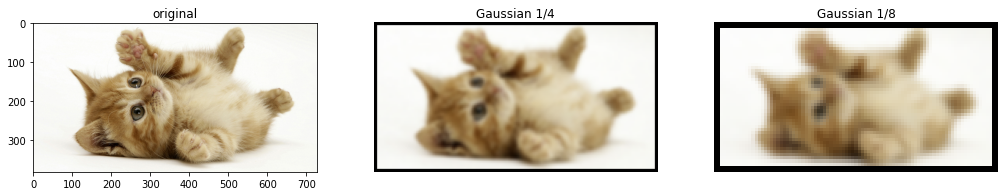

In [158]:
# ----------- plot to do ------------------ #
DownSamp_Gauss_4=DownSamplingGaussianFunction(DownSamp_Origin,1/4)
DownSamp_Gauss_8=DownSamplingGaussianFunction(DownSamp_Origin,1/8)

plt.figure(figsize=(17.3,7)) 

plt.subplot(1,3,1), plt.title('original')
plt.imshow(DownSamp_Origin)
# , plt.axis('off')

plt.subplot(1,3,2), plt.title('Gaussian 1/4')
plt.imshow(DownSamp_Gauss_4), plt.axis('off')

plt.subplot(1,3,3), plt.title('Gaussian 1/8')
plt.imshow(DownSamp_Gauss_8), plt.axis('off')

plt.show()

![](https://i.imgur.com/La6hWUe.png)

# Upsampling

Chosing the 1/8 downsampling picture for upsampling
using Nearest-neighbor interpolation

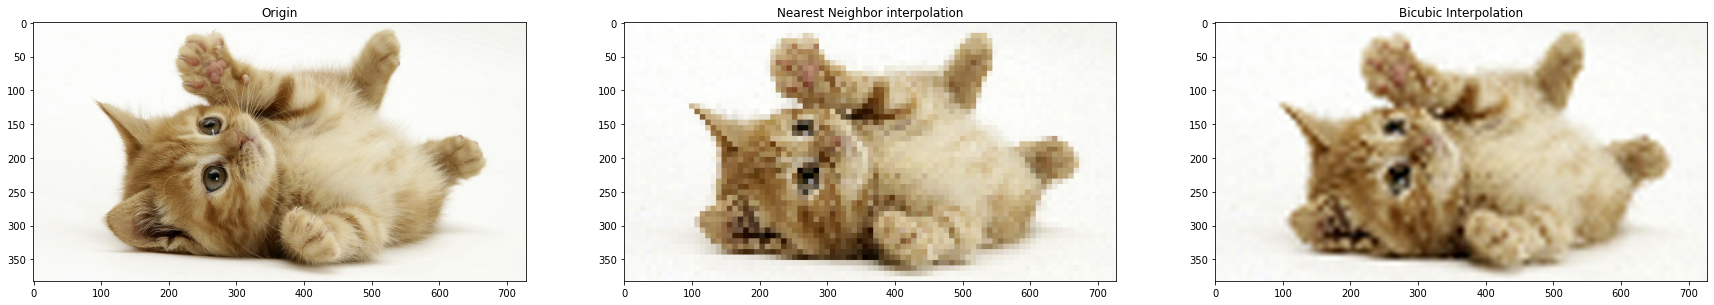

In [159]:
img_x,img_y,_ = img.shape
img_bic = cv2.resize(DownSamp_8, (img_y,img_x), interpolation=cv2.INTER_CUBIC) #INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
img_nn = cv2.resize(DownSamp_8, (img_y,img_x),  interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(30,60))
plt.subplot(1,3,1)
plt.title('Origin')
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
plt.title('Nearest Neighbor interpolation')
plt.imshow(img_nn)
plt.subplot(1,3,3)
plt.title('Bicubic Interpolation')
plt.imshow(img_bic)
plt.show() 

![](https://i.imgur.com/xAKLyTS.png)

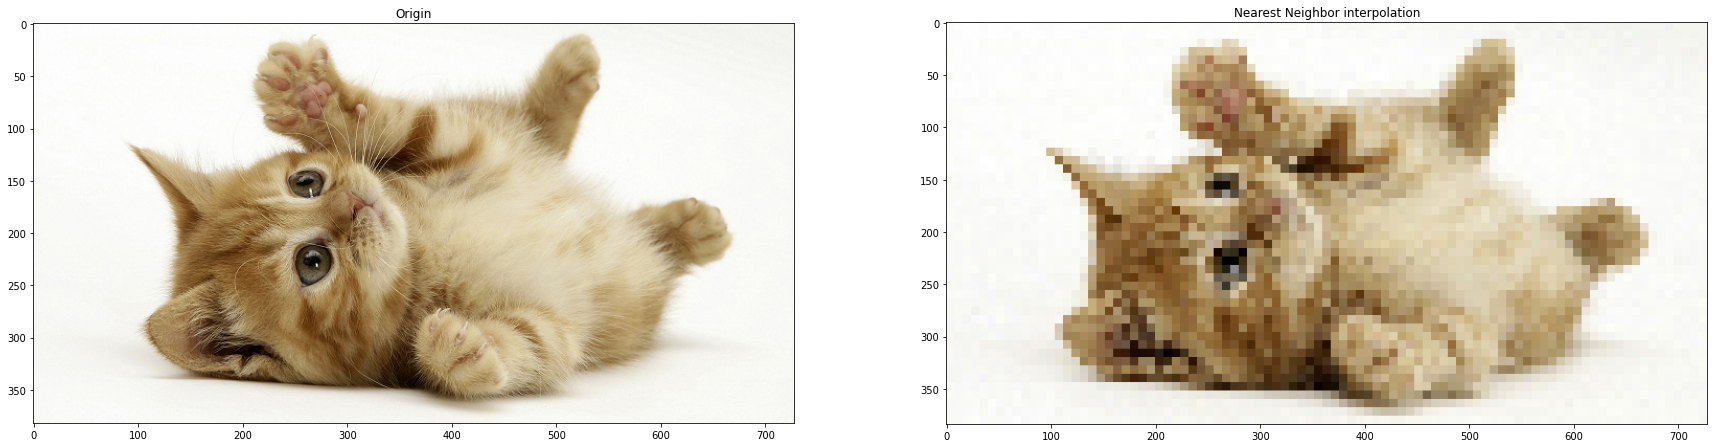

In [160]:
# upsampling
# ---------- to do ------------ #
def UpSamplingFunction(src,samplingScale):#samplingScale>1
    [row,col,depth]=src.shape
    #新圖片大小為:newrow=row*samplingScale  newcol=col*samplingScale
    dst=np.zeros((round(row*samplingScale),round(col*samplingScale),depth), np.uint8)
    
    for x in range(round(row*samplingScale)):
        for y in range(round(col*samplingScale)):
            # ----------- to do ------------------ #
            dst[x,y]=src[int(x/samplingScale),int(y/samplingScale)]
    return dst

resultimg_nn=UpSamplingFunction(DownSamp_8,8) #need change name

plt.figure(figsize=(30,60))
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(DownSamp_Origin) #need change name
plt.subplot(1,2,2)
plt.title('Nearest Neighbor interpolation')
plt.imshow(resultimg_nn)
plt.show() 

![](https://i.imgur.com/qPm43Z8.png)

# Bicubic Interpolation
### [Bicubic Interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
![](https://i.imgur.com/0WMYL73.png)

![](https://i.imgur.com/tQTZhga.png)

In [161]:
# --------------- to do  --------------- #
# Interpolation kernel
def u(x,a):
    if (abs(x) >=0) & (abs(x) <=1):
        return (a+2)*(abs(x)**3)-(a+3)*(abs(x)**2)+1
    elif (abs(x) > 1) & (abs(x) <= 2):
        return a*(abs(x)**3)-(5*a)*(abs(x)**2)+(8*a)*abs(x)-4*a
    return 0

#Paddnig
def padding(img,H,W,C):
    zimg = np.zeros((H+4,W+4,C))
    zimg[2:H+2,2:W+2,:C] = img
    #Pad the first/last two col and row
    zimg[2:H+2,0:2,:C]=img[:,0:1,:C]
    zimg[H+2:H+4,2:W+2,:]=img[H-1:H,:,:]
    zimg[2:H+2,W+2:W+4,:]=img[:,W-1:W,:]
    zimg[0:2,2:W+2,:C]=img[0:1,:,:C]
    #Pad the missing eight points
    zimg[0:2,0:2,:C]=img[0,0,:C]
    zimg[H+2:H+4,0:2,:C]=img[H-1,0,:C]
    zimg[H+2:H+4,W+2:W+4,:C]=img[H-1,W-1,:C]
    zimg[0:2,W+2:W+4,:C]=img[0,W-1,:C]
    return zimg

# Bicubic operation
def bicubic(img, ratio, a):
    #Get image size
    H,W,C = img.shape

    img = padding(img,H,W,C)
    #Create new image
    dH = math.floor(H*ratio)
    dW = math.floor(W*ratio)
    dst = np.zeros((dH, dW, 3))

    h = 1/ratio
    for c in range(C):
      for j in range(dH):
        for i in range(dW):
          x, y = i * h + 2 , j * h + 2

          x1 = 1 + x - math.floor(x)
          x2 = x - math.floor(x)
          x3 = math.floor(x) + 1 - x
          x4 = math.floor(x) + 2 - x

          y1 = 1 + y - math.floor(y)
          y2 = y - math.floor(y)
          y3 = math.floor(y) + 1 - y
          y4 = math.floor(y) + 2 - y

          mat_l = np.matrix([[u(x1,a),u(x2,a),u(x3,a),u(x4,a)]])
          mat_m = np.matrix([[img[int(y-y1),int(x-x1),c],img[int(y-y2),int(x-x1),c],img[int(y+y3),int(x-x1),c],img[int(y+y4),int(x-x1),c]],
                    [img[int(y-y1),int(x-x2),c],img[int(y-y2),int(x-x2),c],img[int(y+y3),int(x-x2),c],img[int(y+y4),int(x-x2),c]],
                    [img[int(y-y1),int(x+x3),c],img[int(y-y2),int(x+x3),c],img[int(y+y3),int(x+x3),c],img[int(y+y4),int(x+x3),c]],
                    [img[int(y-y1),int(x+x4),c],img[int(y-y2),int(x+x4),c],img[int(y+y3),int(x+x4),c],img[int(y+y4),int(x+x4),c]]])
          mat_r = np.matrix([[u(y1,a)],[u(y2,a)],[u(y3,a)],[u(y4,a)]])
          dst[j, i, c] = np.dot(np.dot(mat_l, mat_m),mat_r)
            
    return dst.astype(int)

# Scale factor
ratio = 2
# Coefficient
a = -1/2
Bicubic_result = bicubic(DownSamp_4, ratio, a)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


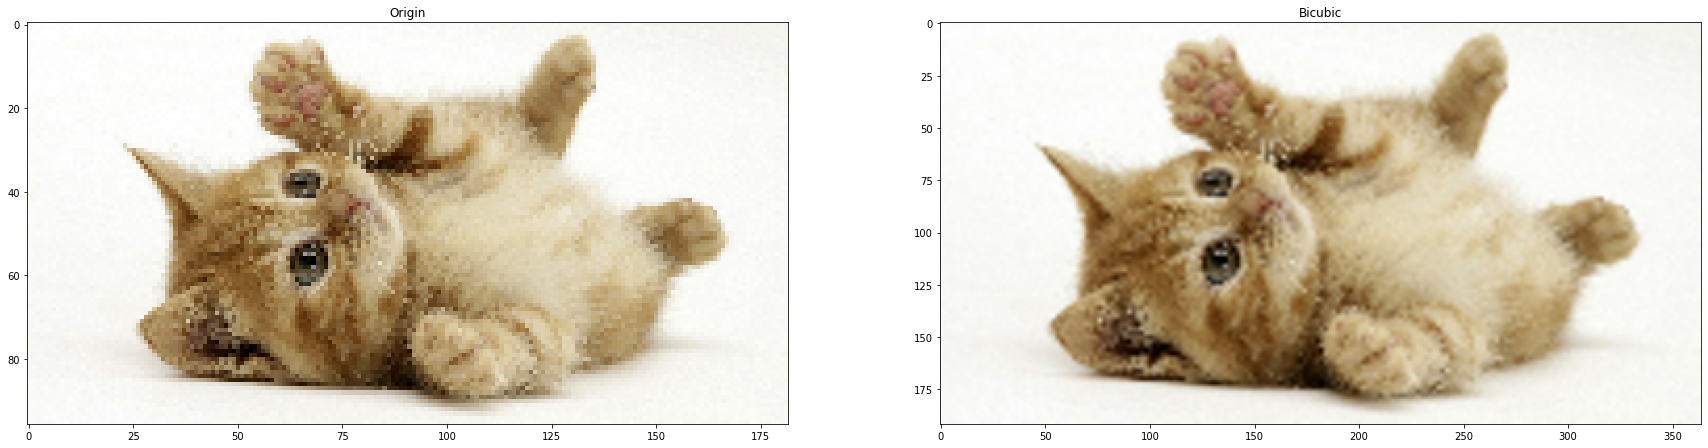

In [162]:
plt.figure(figsize=(30,60))
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(DownSamp_4)
plt.subplot(1,2,2)
plt.title('Bicubic')
plt.imshow(Bicubic_result,vmin=0,vmax=255)
plt.show() 
